In [3]:
%load_ext autoreload
%autoreload 2

from satsense.features import rgNDVI, rbNDVI, nirNDVI, print_ndvi_stats
from satsense.features import RGB, QUICKBIRD, WORLDVIEW2
from satsense.util import load_from_file, get_rgb_image

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

# Import the NumPy module
import numpy as np

# Convient for outputting dictionaries
import json

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Open a GDAL dataset
imagefile = '/home/bweel/Documents/projects/dynaslum/data/satelite/WorldView.tif'
bands = WORLDVIEW2

In [7]:
dataset, image = load_from_file(imagefile)
       
print('Red band mean: {r}'.format(r=image[:, :, bands['red']].mean()))

Red band mean: 246.54786735983456


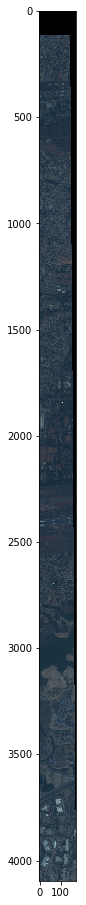

In [8]:
# use "imshow" for an image -- nir at first
true_color = get_rgb_image(image, bands, normalized=False)


plt.rcParams["figure.figsize"] = [40, 16]
plt.imshow(true_color)

In [10]:
ndvi = rgNDVI(image, bands=bands)

print_ndvi_stats(ndvi)

NDVI matrix: 
[[        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 [        nan         nan         nan ...,         nan         nan
          nan]
 ..., 
 [-0.25386715 -0.22914219 -0.2300578  ..., -0.29763387 -0.15758755
  -0.18807811]
 [-0.25863521 -0.25294118 -0.23777778 ..., -0.32492114 -0.22727273
  -0.16977612]
 [-0.23469388 -0.26118626 -0.29355609 ..., -0.25156446 -0.19857313
  -0.13632205]]

Max NDVI: 0.11910112359550562
Mean NDVI: -0.26490594193718997
Median NDVI: -0.2547864506627393
Min NDVI: -0.7590361445783133


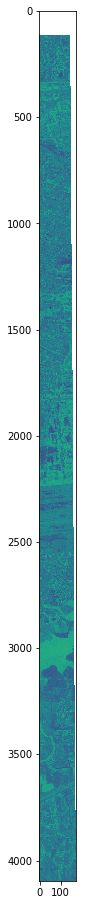

In [11]:
plt.rcParams["figure.figsize"] = [20, 16]
plt.imshow(-ndvi)